# Build a two layer NN with keras

Implement our two layer neural network using keras!

Start with a neural network that jsut does logistic regression. Make sure you can
identify all the pieces from `20-logistic-regression.ipynb` in your keras setup.

Once you have your logistic regression model working extend it to have one hidden layer
with dimension 20 (or there abouts). Think about what nonlinearity (or activation function) you want to use.

Keras documentation: https://keras.io/getting-started/sequential-model-guide/ (note that this uses a slightly different API compared to the previous keras example.)

Look at https://keras.io/callbacks/#tensorboard and see what it produces in terms of debugging information in tensorboard.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

In [2]:
import keras
from keras.datasets.mnist import load_data as mnist_data
from keras.datasets.fashion_mnist import load_data
from keras.layers import Input, Dense, Activation
from keras.models import Model

# the first time you execute this it will download the
# dataset for you from the internet
(X_train, y_train), (X_test, y_test) = load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train /255
X_test = X_test /255

# use a keras builtin utility for the one-hot encoding
from keras import utils
num_classes = 10
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


We are now using slightly larger images. They are 28x28 pixels large and show clothing items. There are ten classes as in the digits dataset. Feel free to reuse soem code from before to visualise examples from the dataset to get a feeling for what is in it. You can find information about the dataset here: https://github.com/zalandoresearch/fashion-mnist

The cells below create a logistic regression "neural network" like we have done by hand.

In [3]:
# we define the input shape (i.e., how many input features)
# **without** the batch size
x = Input(shape=(28*28, ))

# all Keras Ops look like z = f(z) (think functional programming)
# this is how you'd specify a hidden layer of size 20 using the
# relu activation function.
#h = Dense(20)(x)
#h = Activation('relu')(h)

# our outputs are 10 numbers, the probability for each class
h = Dense(10)(x)
y = Activation('softmax')(h)

# Package it all up in a Model
net = Model(x, y)

In [4]:
# compile the model
net.compile(optimizer='sgd',
            loss=keras.losses.categorical_crossentropy,
            metrics=['accuracy'])

In [5]:
history = net.fit(X_train, y_train, validation_split=0.2,
                  epochs=40, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
 - 3s - loss: 0.8727 - acc: 0.7238 - val_loss: 0.6588 - val_acc: 0.7883
Epoch 2/40
 - 3s - loss: 0.6189 - acc: 0.8000 - val_loss: 0.5811 - val_acc: 0.8073
Epoch 3/40
 - 2s - loss: 0.5626 - acc: 0.8166 - val_loss: 0.5541 - val_acc: 0.8141
Epoch 4/40
 - 3s - loss: 0.5329 - acc: 0.8256 - val_loss: 0.5247 - val_acc: 0.8231
Epoch 5/40
 - 2s - loss: 0.5130 - acc: 0.8298 - val_loss: 0.5142 - val_acc: 0.8229
Epoch 6/40
 - 3s - loss: 0.4990 - acc: 0.8351 - val_loss: 0.4964 - val_acc: 0.8309
Epoch 7/40
 - 2s - loss: 0.4881 - acc: 0.8366 - val_loss: 0.4919 - val_acc: 0.8297
Epoch 8/40
 - 2s - loss: 0.4795 - acc: 0.8404 - val_loss: 0.4855 - val_acc: 0.8323
Epoch 9/40
 - 2s - loss: 0.4722 - acc: 0.8430 - val_loss: 0.4774 - val_acc: 0.8356
Epoch 10/40
 - 3s - loss: 0.4660 - acc: 0.8445 - val_loss: 0.4717 - val_acc: 0.8369
Epoch 11/40
 - 3s - loss: 0.4608 - acc: 0.8459 - val_loss: 0.4658 - val_acc: 0.8395
Epoch 12/40
 - 3s - loss: 0.4558 - 

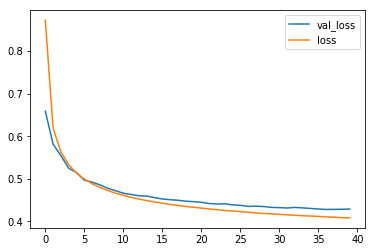

In [6]:
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.legend()

## Exercises

### Hyper parameters settings

- Experiment with different hyper parameters:
  - learning rate used by the optimiser,
  - change to a different optimiser (ADAM is a good choice),
  - size of the hidden layer,
  - weight initialization scheme,
  - use other activation functions,
  - add support for a second, third, n-th hidden layer,
  - checkout the `callback` argument to `fit`.
- How high can you get your accuracy? (test or train?)
- Create an imbalanced dataset where one category has 10x as many samples as the other category. What accuracy can you achieve? Is it impressive?
- What happens when you reduce the number of training samples?
- Can you train only on the even numbers and then correctly classify the odd number as well as the even numbers?
- What happens to the classification accuracy if you add a bit of noise to each image?
- How should you decide for how many epochs to train?

To find how to change the optimiser and set parameters on it, weight initialisations, and
all that make sure to browse the [keras documentation](https://keras.io/models/model/).

You can also look at the interactive documentation by writing any Python object you want to see the documentation for in a new notebook cell and placing a question mark after it. For example to learn more about `model.compile` write `model.compile?` in a new cell and run it.

Make sure to frequently restart your kernel and run everything from the top. The notebook
interface allows you to run cells in any order which is nice for exploration and interactive
work but does mean sometimes your kernel ends up in a weird state. "Restart&run all" is a best practice when using notebooks.